In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
import math

from collections import defaultdict

matplotlib.rcParams['figure.figsize'] = (24, 18)
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams.update({'font.size': 20})

In [2]:
ego_ped_matrix = np.load("../details/ego_ped_matrix.npy")

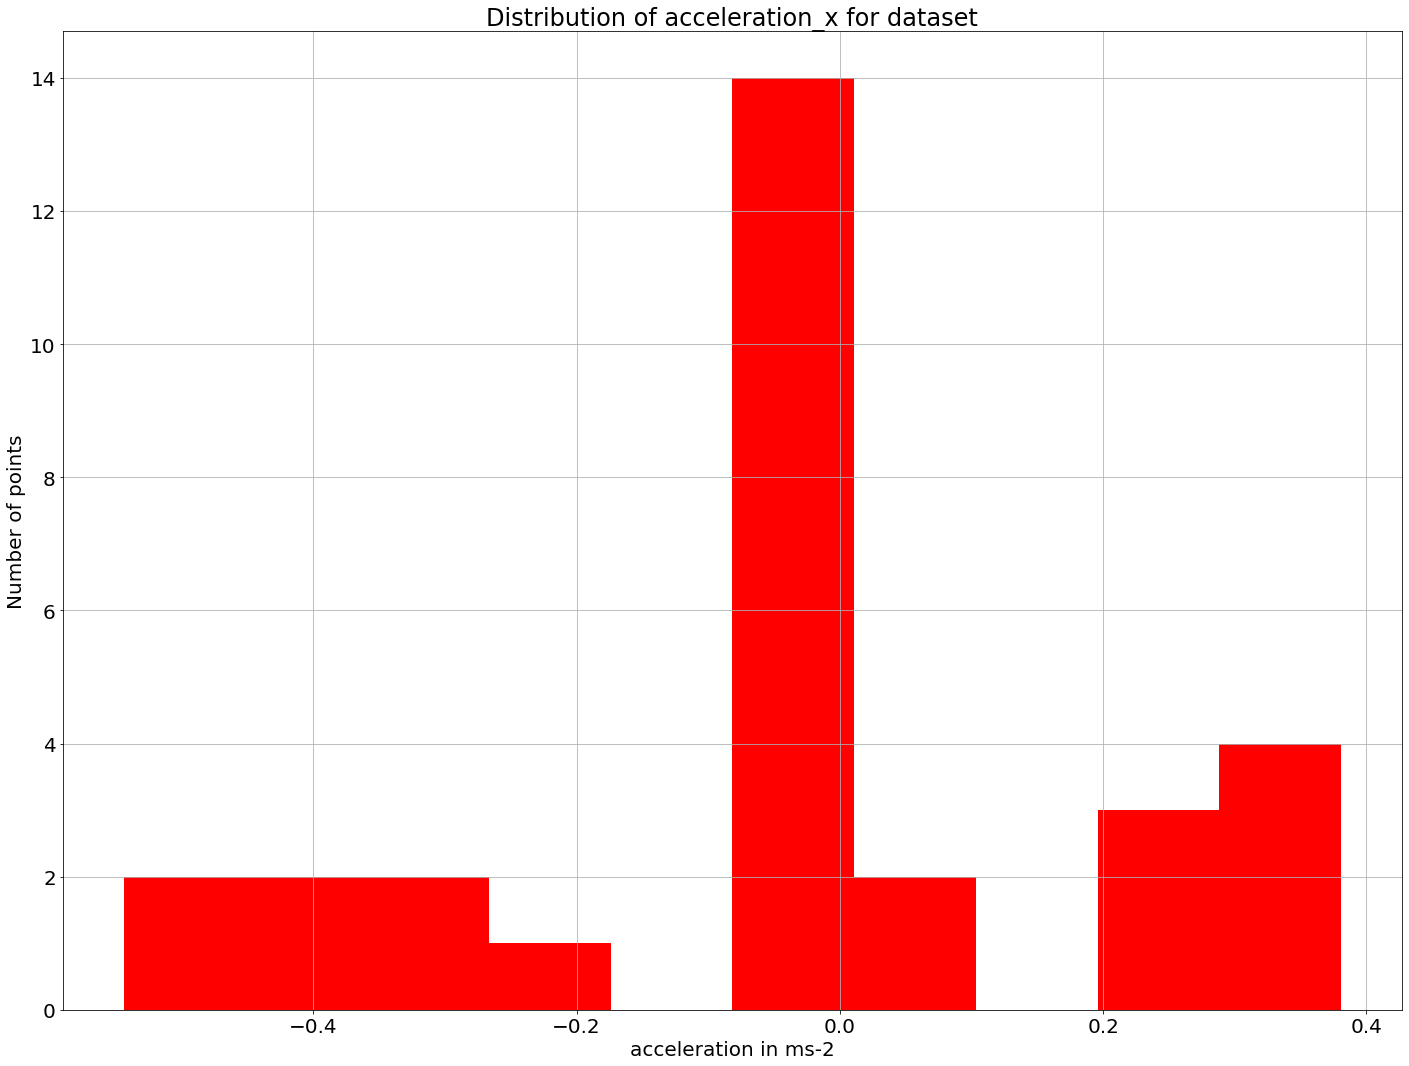

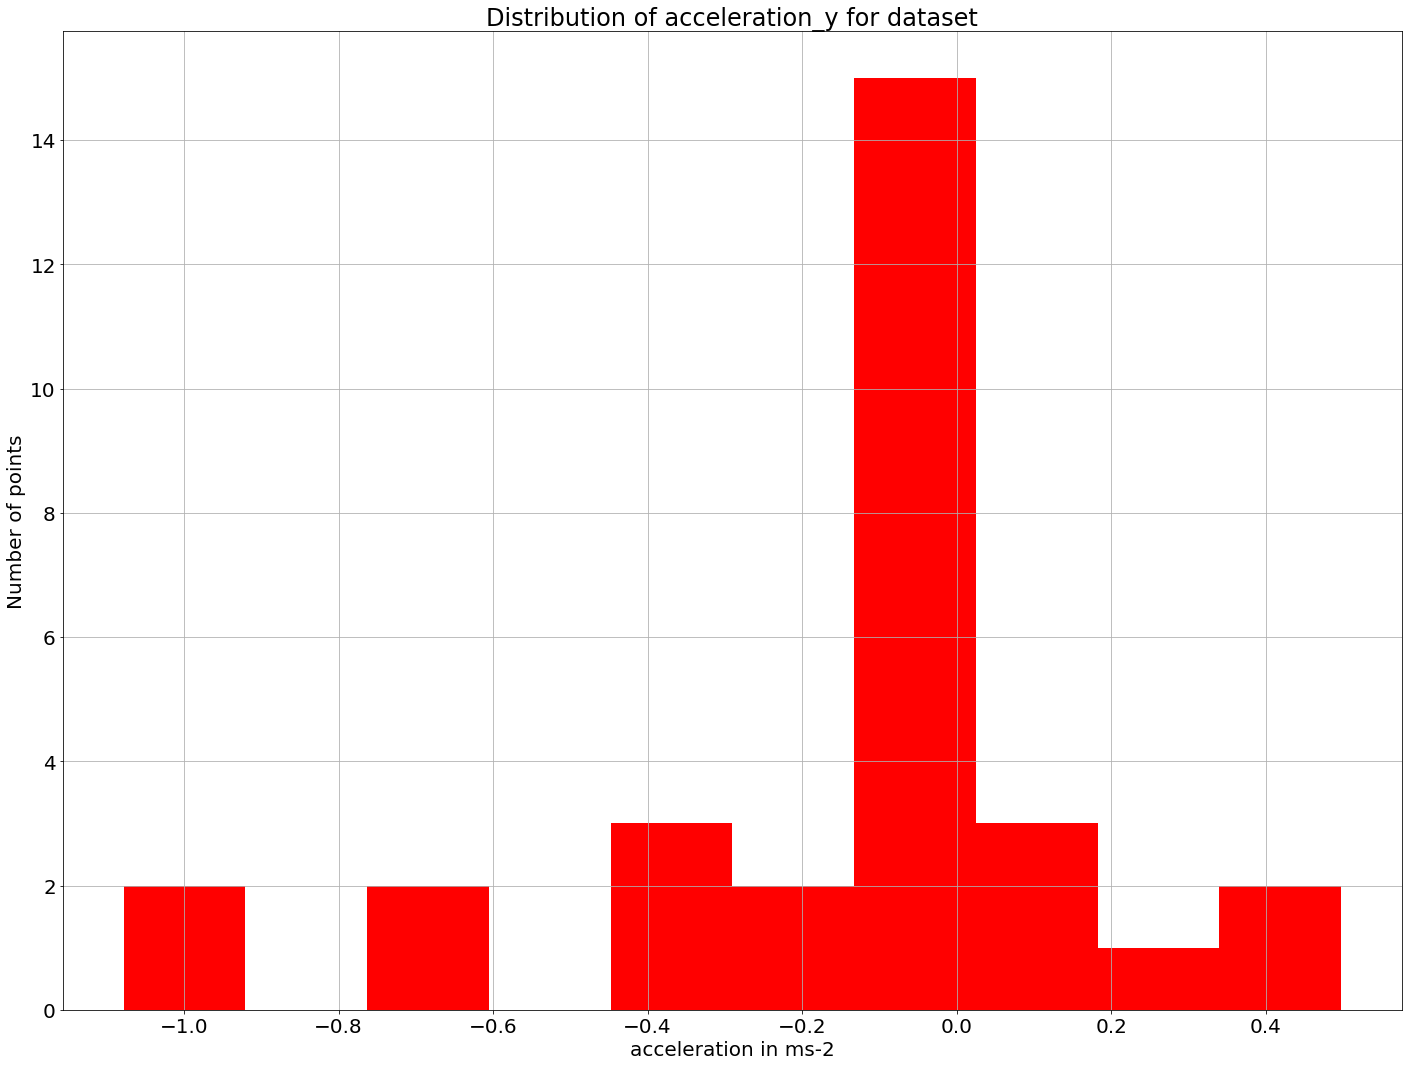

In [34]:
situation_idx = [9804, 9805, 10245, 11334, 12201]

normal_ax = list()
normal_ay = list()

situation_ax = list()
situation_ay = list()

for i in range(len(ego_ped_matrix)):
    cur_ax = list(ego_ped_matrix[i,0,:6,4])
    cur_ay = list(ego_ped_matrix[i,0,:6,5])
    if i in situation_idx:
        situation_ax += cur_ax
        situation_ay += cur_ay
    else:
        normal_ax += cur_ax
        normal_ay += cur_ay
        
# plt.hist(normal_ax, color='b')
plt.hist(situation_ax, color='r')
plt.title("Distribution of acceleration_x for dataset")
plt.xlabel("acceleration in ms-2")
plt.ylabel("Number of points")
plt.grid()
plt.show()

plt.hist(situation_ay, color='r')
plt.title("Distribution of acceleration_y for dataset")
plt.xlabel("acceleration in ms-2")
plt.ylabel("Number of points")
plt.grid()
plt.show()

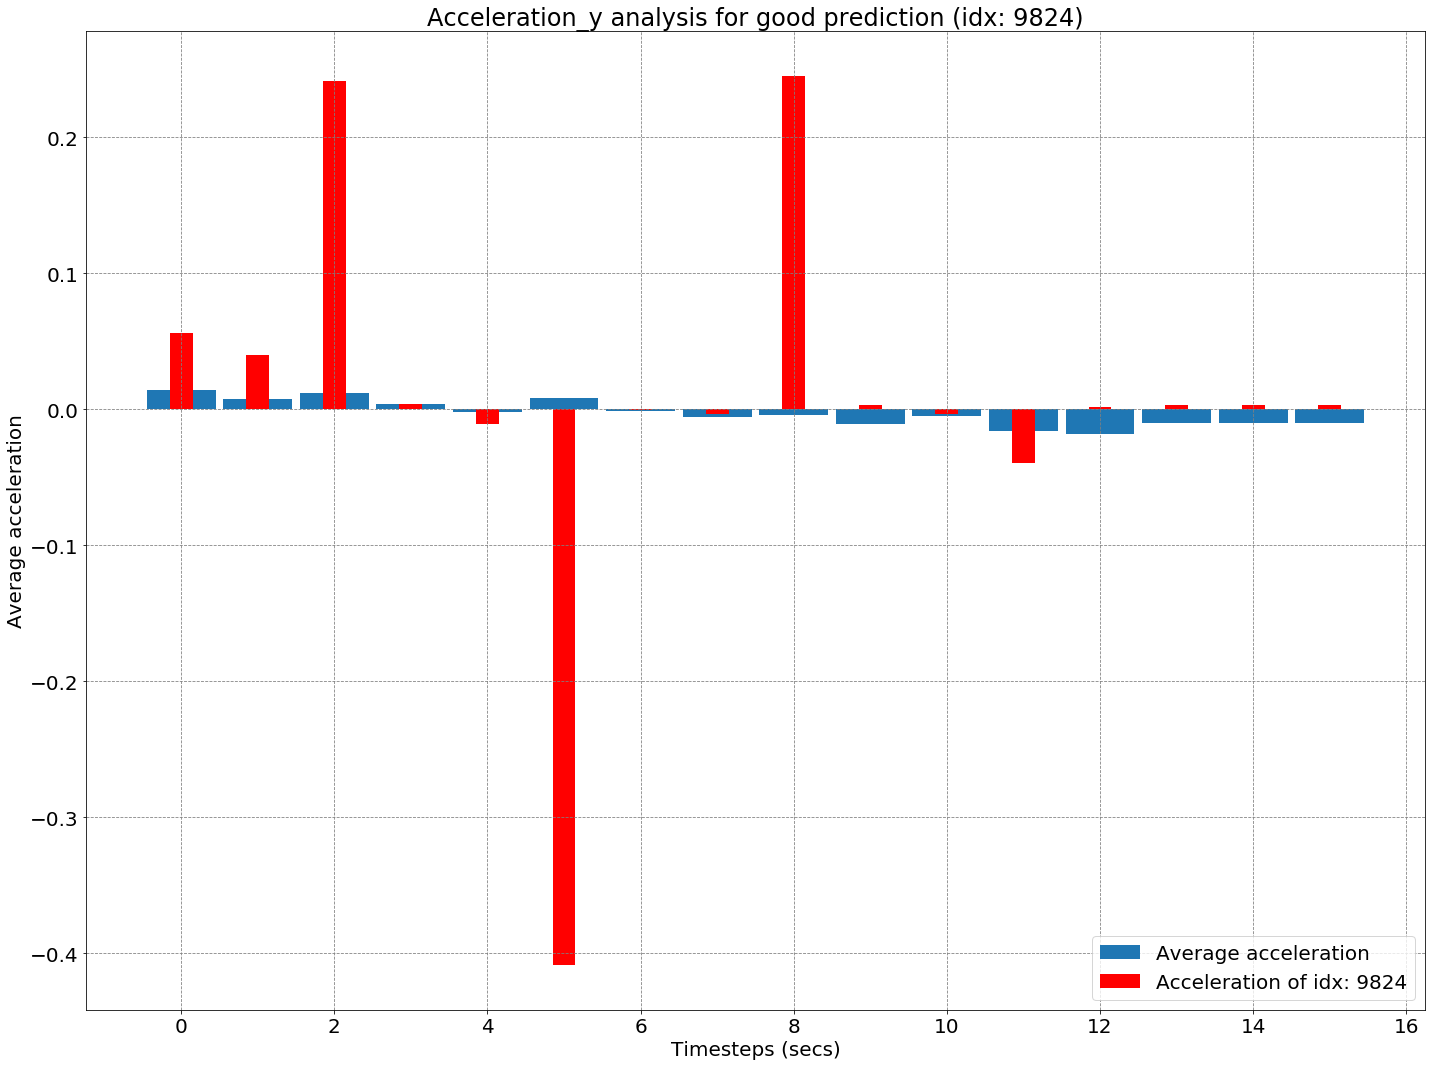

In [3]:
noisy_idx = [9805, 9804, 10245, 11334, 10591]

accx_dict = defaultdict(list)
accy_dict = defaultdict(list)

for i in range(len(ego_ped_matrix)):
    for j in range(ego_ped_matrix.shape[2]):
        accx_dict[j].append(ego_ped_matrix[i,0,j,4])        
        accy_dict[j].append(ego_ped_matrix[i,0,j,5])
        
# for idx in noisy_idx:
idx = 9824
cur_accy = ego_ped_matrix[idx, 0, :, 5]
plt.bar(accy_dict.keys(), [np.mean(accy_dict[t]) for t in accy_dict.keys()], width=0.9)
plt.bar(accy_dict.keys(), cur_accy, width=0.3, color='r')
plt.title(f"Acceleration_y analysis for good prediction (idx: {idx})")
plt.xlabel("Timesteps (secs)")
plt.ylabel("Average acceleration")
plt.grid(color='gray', linestyle='dashed')
plt.legend(["Average acceleration", f"Acceleration of idx: {idx}"], 
          loc='lower right')
# plt.savefig(f"../images/noisy_op_analysis/accx_{idx}.png", bbox_inches='tight', pad_inches=1)
plt.show()

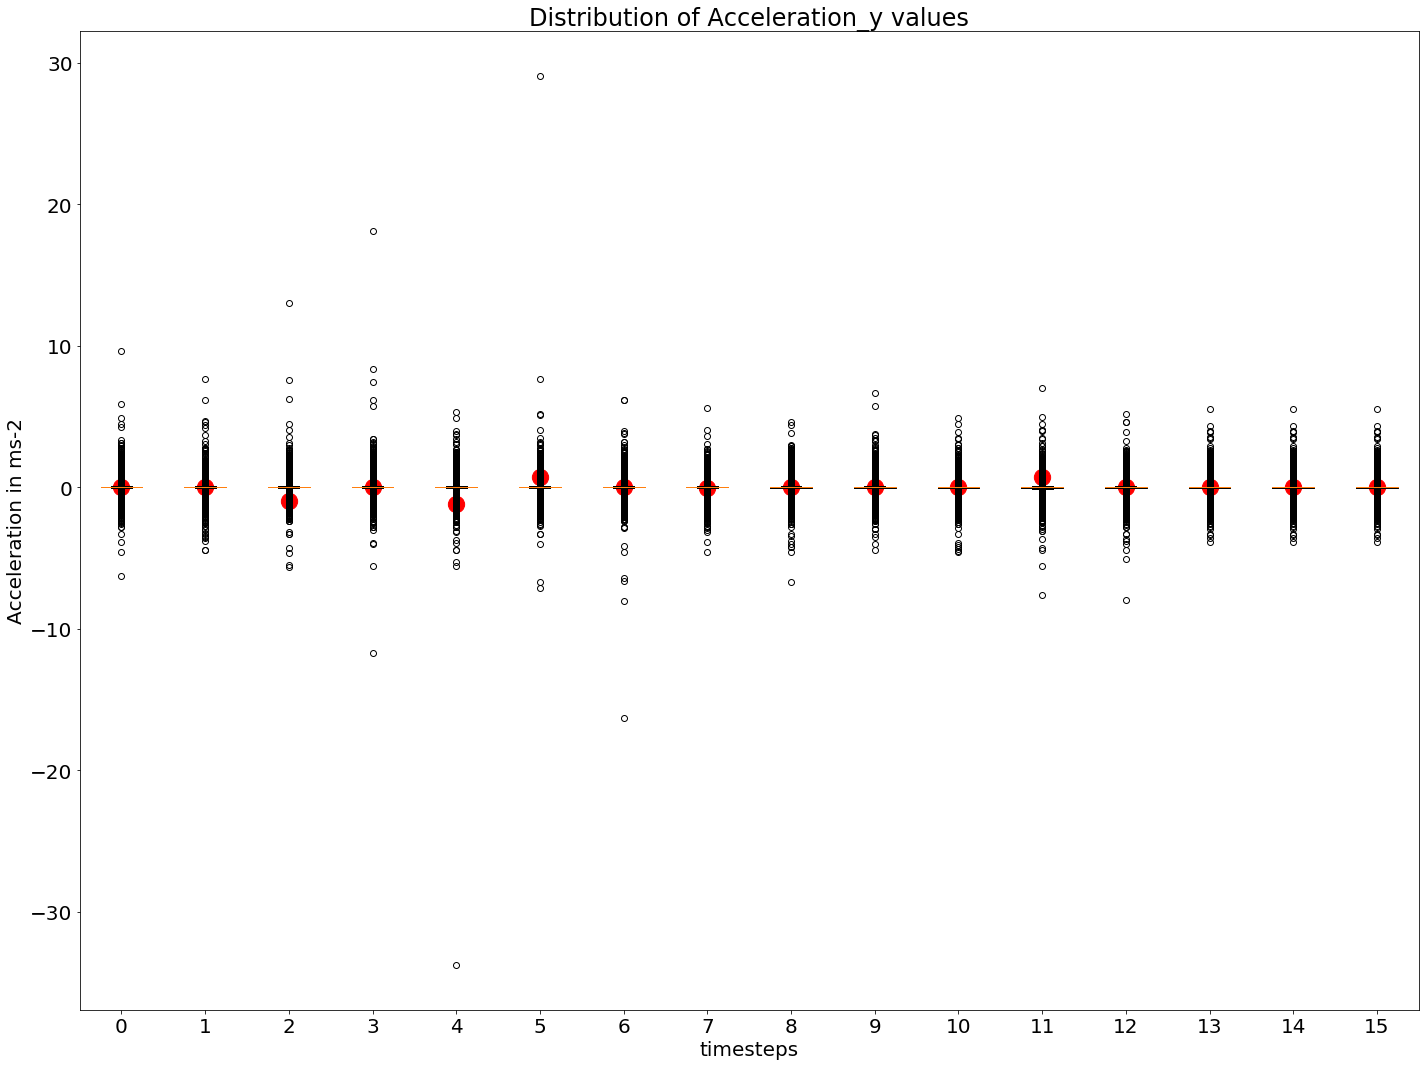

In [22]:
# 'transpose' items to parallel key, value lists
labels, data = [*zip(*accx_dict.items())]  

# plt.boxplot(data)
# plt.title("Distribution of Acceleration_x values")
# plt.xlabel("timesteps")
# plt.ylabel("Acceleration in ms-2")
# plt.xticks(range(1, len(labels) + 1), labels)

# plt.scatter(range(1, len(labels) + 1),
#             ego_ped_matrix[9805,0,:,4], color='r', s=265)
# plt.show()

# 'transpose' items to parallel key, value lists
labels, data = [*zip(*accy_dict.items())]  

plt.boxplot(data)
plt.title("Distribution of Acceleration_y values")
plt.xlabel("timesteps")
plt.ylabel("Acceleration in ms-2")
plt.xticks(range(1, len(labels) + 1), labels)

plt.scatter(range(1, len(labels) + 1),
            ego_ped_matrix[10895,0,:,5], color='r', s=265)
plt.show()

# TTC analysis

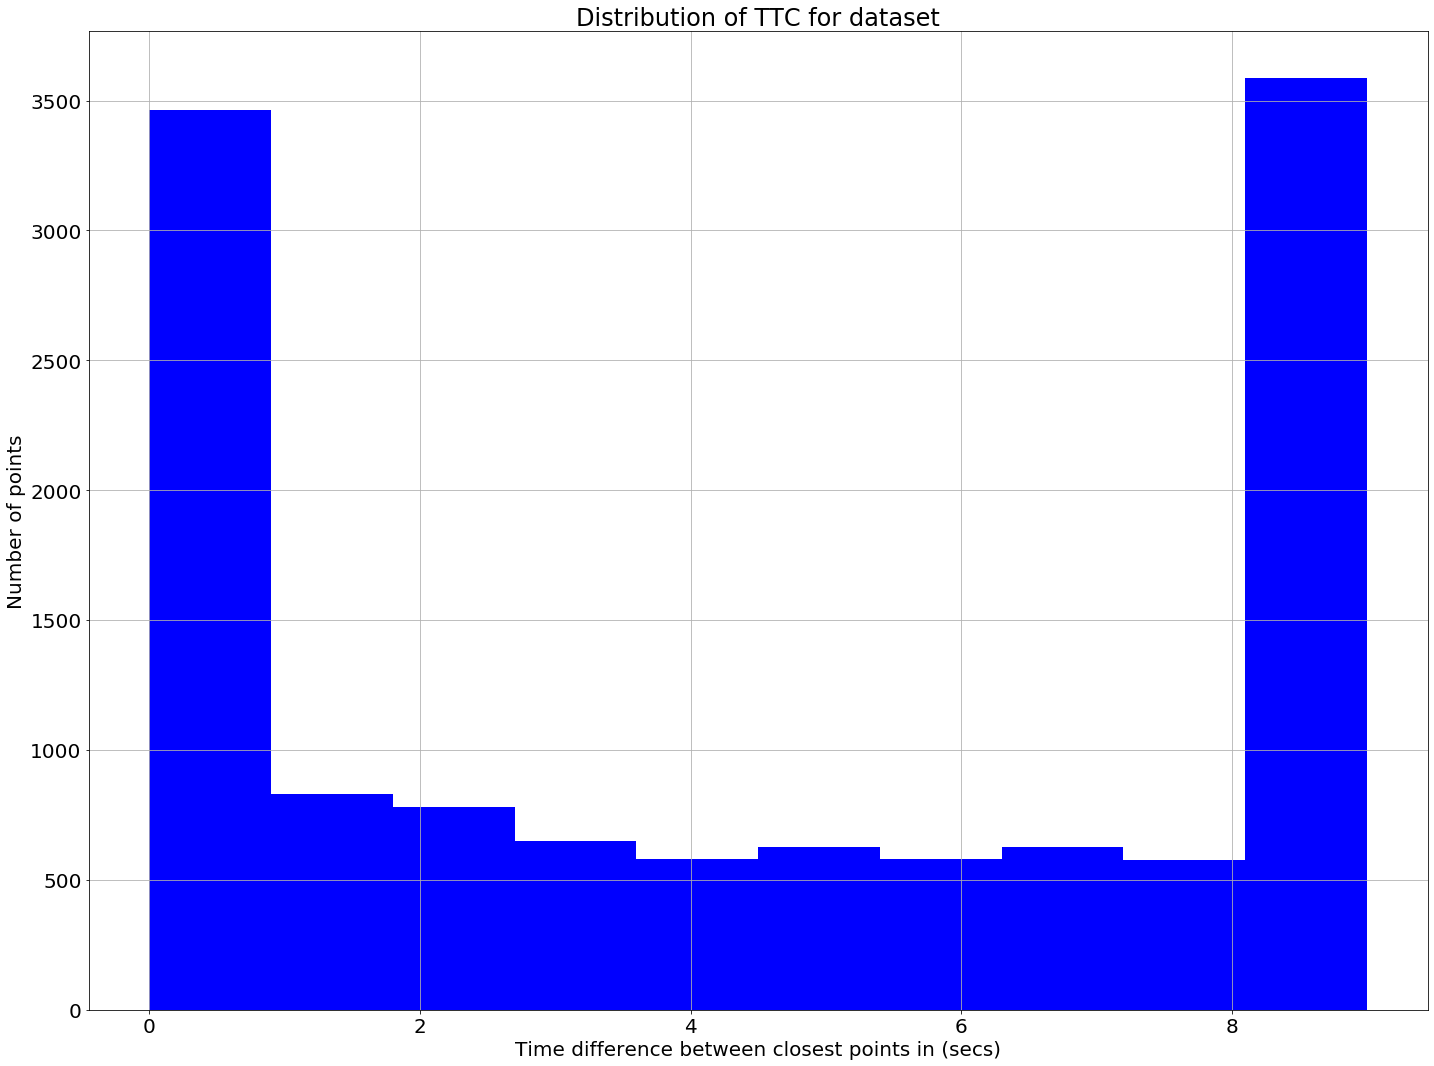

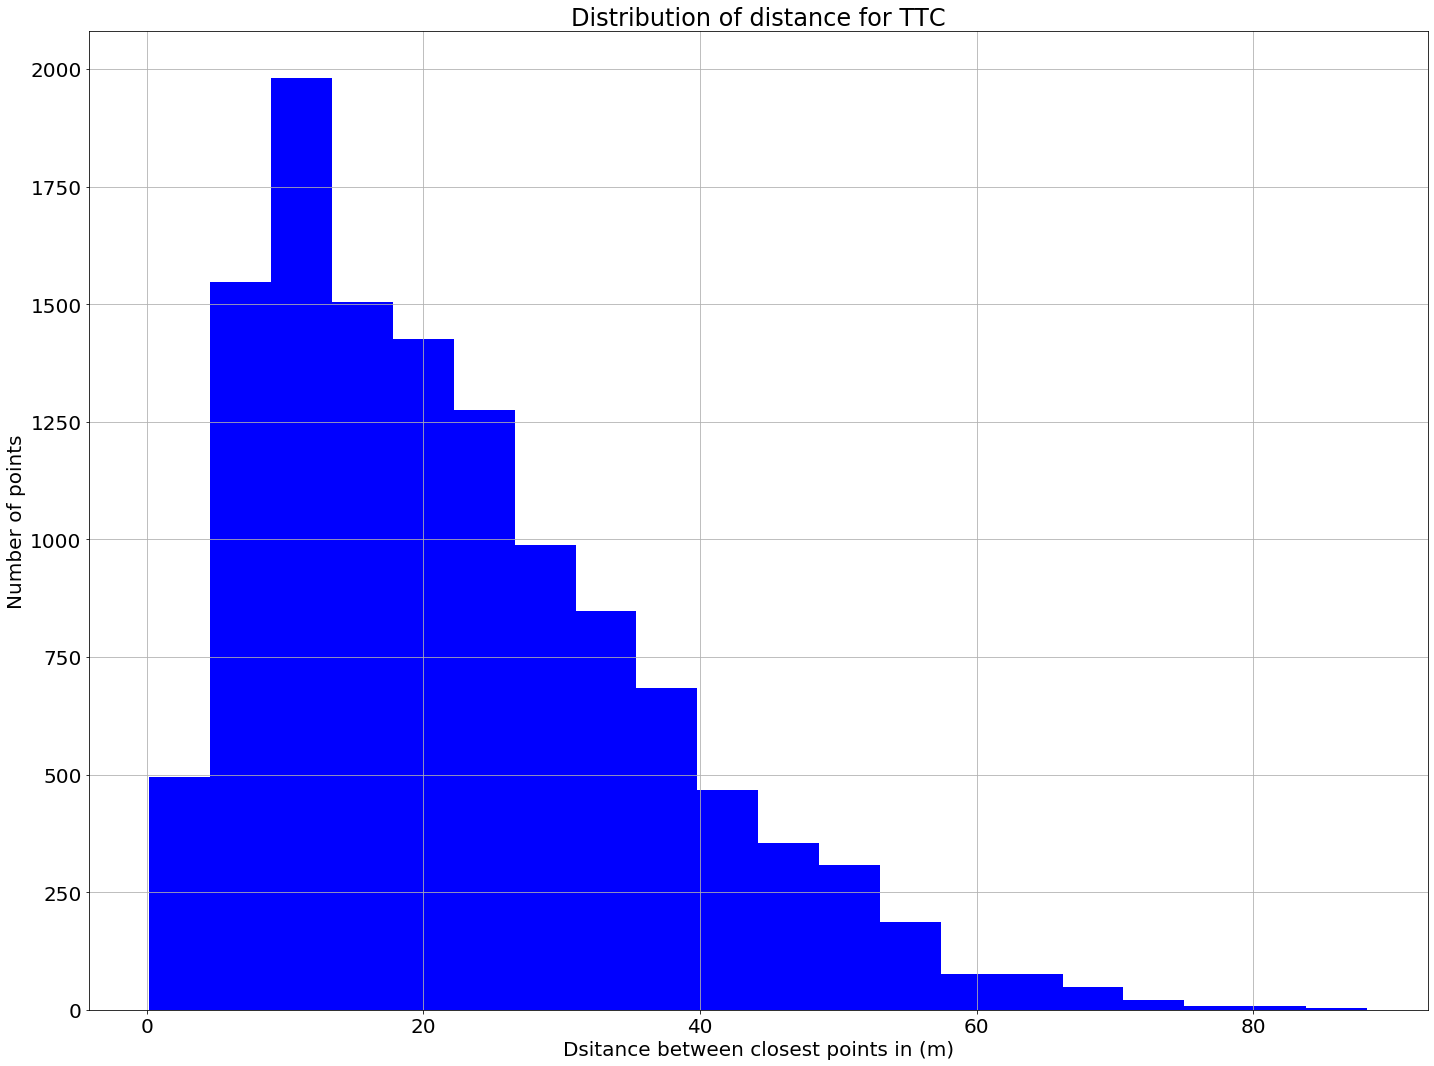

In [23]:
# calculation of time distane between ego and pedestrian
min_times = []
min_dists = []

def calculate_min_time(ped_path, ego_path):
    del_time = 0.0
    del_dist = np.inf
    for j in range(ped_path.shape[0]):
        for k in range(ego_path.shape[0]):
            ped_pos = ped_path[j,:]
            ego_pos = ego_path[k,:]

            dist = np.sqrt(np.sum((ped_pos - ego_pos)**2))
            if dist < del_dist:
                del_dist = dist
                del_time = abs(j-k)

    return del_time, del_dist

for i in range(len(ego_ped_matrix)):
    ped_path = ego_ped_matrix[i,0,6:,:2]
    ego_path = ego_ped_matrix[i,1,6:,:2]
    
    cur_time, cur_dist = calculate_min_time(ped_path, ego_path)
    min_times.append(cur_time)
    min_dists.append(cur_dist)
    
plt.hist(min_times, color='b')
plt.title("Distribution of TTC for dataset")
plt.xlabel("Time difference between closest points in (secs)")
plt.ylabel("Number of points")
plt.grid()
plt.savefig("../images/ttc_analysis/ttc_times.png", bbox_inches='tight', pad_inches=1)
plt.show()

plt.hist(min_dists, bins=20, color='b')
plt.title("Distribution of distance for TTC")
plt.xlabel("Dsitance between closest points in (m)")
plt.ylabel("Number of points")
plt.grid()
plt.savefig("../images/ttc_analysis/ttc_dists.png", bbox_inches='tight', pad_inches=1)
plt.show()

In [24]:
ttc_dict = defaultdict(list)

for t, d in zip(min_times, min_dists):
    d = round(d)
    if d < 11:
        ttc_dict[d].append(t)

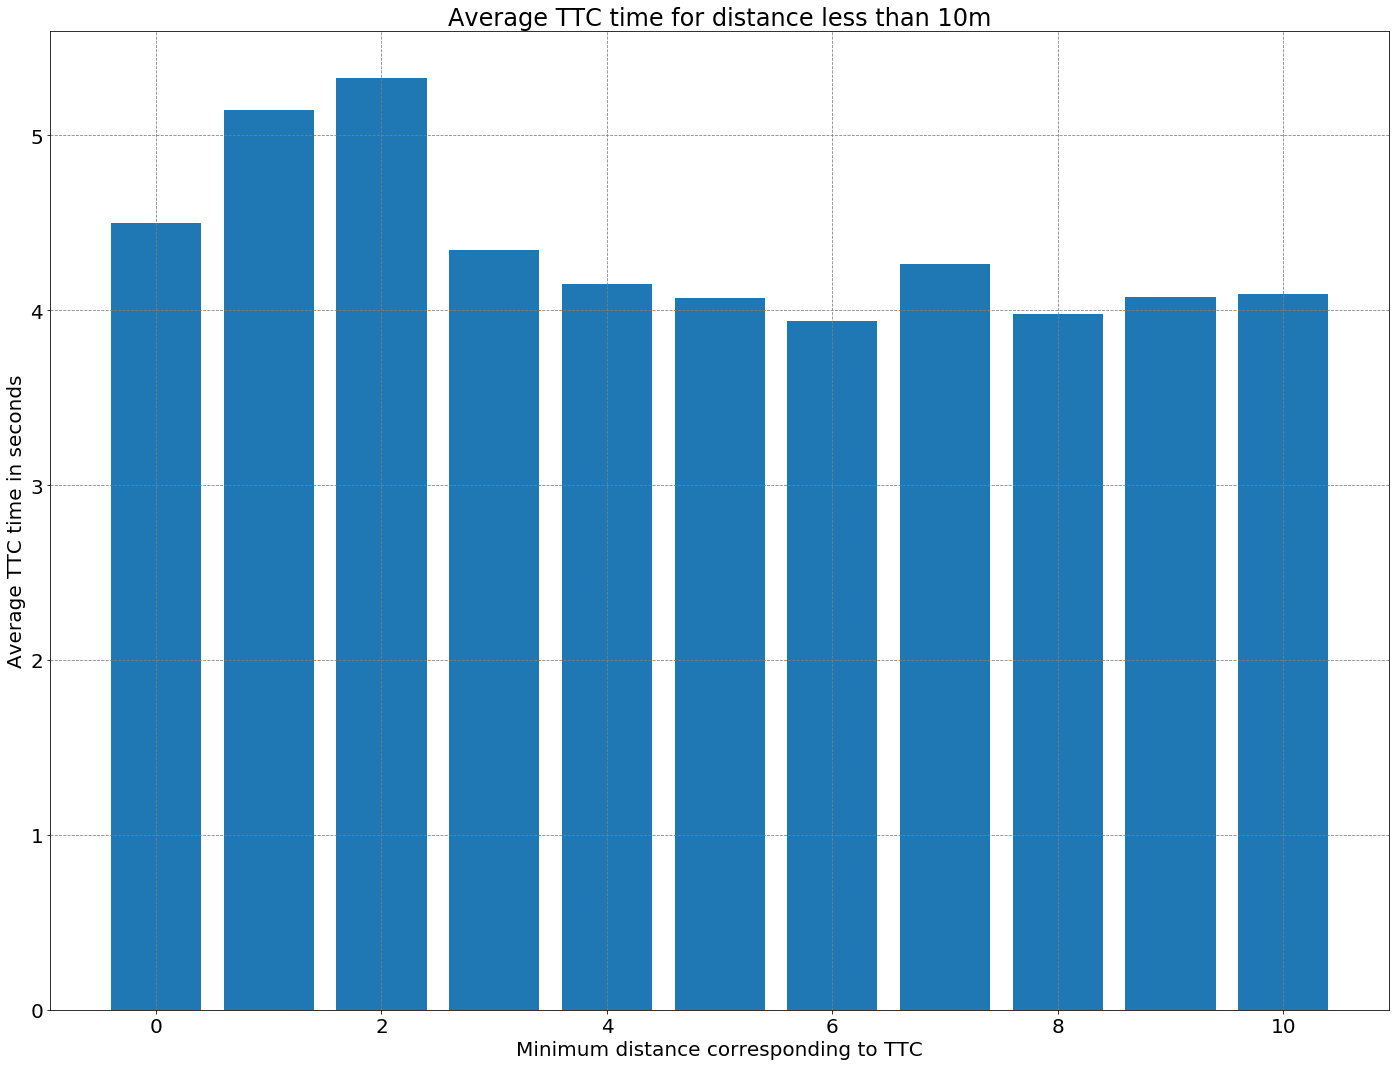

In [29]:
plt.bar(ttc_dict.keys(), [np.mean(ttc_dict[d]) for d in ttc_dict.keys()])
plt.title("Average TTC time for distance less than 10m")
plt.xlabel("Minimum distance corresponding to TTC")
plt.ylabel("Average TTC time in seconds")
plt.grid(color='gray', linestyle='dashed')
plt.savefig("../images/ttc_analysis/avg_ttc_10.png", bbox_inches='tight', pad_inches=1)
plt.show()